## Premise Classification

Here is a simple baseline for Premise Classification using RoBERTa model from [Simple Transformers](https://simpletransformers.ai/) library.

In [1]:
#import libs
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging
import seaborn as sn
import matplotlib.pyplot as plt

2022-06-21 19:32:49.046616: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
#logging 
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

### Training

In [3]:
#read train dataset
train = pd.read_csv('data/train.tsv', sep='\t')

In [4]:
#rename columns to match SimpleTransformers format
column_names = {'Tweet': 'text', 'Premise':'labels'}
train = train.rename(columns = column_names)

train

,id,text,Claim,Stance,labels
0,3054935,@realDonaldTrump It's too dangerous to hold th...,school closures,FAVOR,1
1,453444,If masks are so important why is the public no...,face masks,AGAINST,1
2,211600,But if schools close who is gonna occupy those...,school closures,FAVOR,1
3,3049718,@GavinNewsom be the Governor I thought you wer...,stay at home orders,FAVOR,1
4,5039679580998,@BBCNews 1. You are reporting 78% uptake on ma...,face masks,FAVOR,1
...,...,...,...,...,...
3551,333323,@BremainInSpain #lockdown is a #lifechoice for...,stay at home orders,FAVOR,1
3552,910360,The next fucking asshole that tells me there i...,school closures,FAVOR,1
3553,769878,Learning should be constant...then . Why not i...,school closures,FAVOR,1
3554,648731,Every lockdown has had One Common Clause “Esse...,school closures,AGAINST,1


Let's train our model!

In [8]:
# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1)

In [10]:
%%time
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args
)
model.train_model(train)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

  0%|          | 0/3556 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_128_2_2


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/445 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.


CPU times: user 30.4 s, sys: 9.99 s, total: 40.4 s
Wall time: 49.5 s


(445, 0.5568379437990403)

### Validation

In [31]:
#read validation dataset
val = pd.read_csv('task2_data/validation.tsv', sep='\t')

#rename columns and values to match the format
val = val.rename(columns=column_names)

In [33]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(val)
result

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/600 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_128_2_2


Running Evaluation:   0%|          | 0/75 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.5553213483570286, 'tp': 170, 'tn': 302, 'fp': 78, 'fn': 50, 'auroc': 0.875651913875598, 'auprc': 0.787590895718238, 'eval_loss': 0.4346450596054395}


{'mcc': 0.5553213483570286,
 'tp': 170,
 'tn': 302,
 'fp': 78,
 'fn': 50,
 'auroc': 0.875651913875598,
 'auprc': 0.787590895718238,
 'eval_loss': 0.4346450596054395}

In [34]:
#Make predictions on validation tweets
tweets_val = list(val['text'])
stance_predictions = model.predict(tweets_val)[0]
val['predictions'] = stance_predictions

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

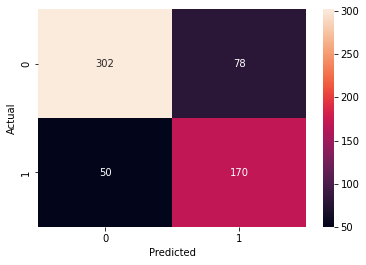

In [35]:
#Let's look at model's predictions distribution
confusion_matrix = pd.crosstab(val['labels'], val['predictions'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

In [36]:
#Final submission is need to be in the following format
val = val.drop(columns=['labels', 'Stance']).rename(columns={'predictions':
                                                      'Premise'})
val

,id,text,Claim,Premise
0,7212131785749,Ordered a mask that had a cute chain attached ...,face masks,0
1,2367433035,Who is ready for some #baseball? #BaseballisB...,stay at home orders,0
2,496011,"@Mystere07623203 @va_shiva @Liberty13046 130,0...",face masks,1
3,1490686,When they ask me what I did with my life I wil...,face masks,0
4,1209366,Taylor not putting her album in physical store...,stay at home orders,0
...,...,...,...,...
595,2949472,@BrianKempGA is one of the few #Governors that...,face masks,0
596,208269,I tested positive for Covid. Got it from a fri...,face masks,1
597,2316008,"If you are under retirement age, you have a *m...",stay at home orders,1
598,659269,@TheLalasventure @doqholliday @realDonaldTrump...,face masks,0
